# Rejection Sampling 

In [1]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Part a : Rejection sampling function

In [2]:
def rejection_sampling(target_distribution, ref_distribution, num_sample, m):
    """1-D rejection sampler
       Input: target distribution
              reference distribution
              number of samples
              M
       Output: samples
               acceptance rate
               M
    """
    n_sample = 0
    n_accpt_sample = 0
    accept_sample = []
    while n_accpt_sample < num_sample:
        sample = ref_distribution.rvs(size = 1) [0]
        u = stats.uniform.rvs(size = 1) [0]
        # Check whether M is large enough
        if target_distribution(sample) > m*ref_distribution.pdf(sample):
            print("Choose a larger M!!!")
            return
        # Check whether accept sample
        if u < (target_distribution(sample)/float(m*ref_distribution.pdf(sample))):
            accept_sample.append(sample)
            n_accpt_sample += 1
        n_sample += 1
    accpt_rate = num_sample / float(n_sample)
    y = accept_sample, accpt_rate, m 
    return y

  

## Part b: Reference -- Cauchy, Target -- Laplace

In [3]:
def laplace (x, mu = 0, b = 1):
    """Function define a Laplace distribution f(x)
       Input: x a scaler 
       Output: y = f(x)
    """
    return (1 / float(b)) * math.exp(- math.fabs(x - mu) / float(b)) 

In [4]:
##
# Find a good M when ref is cauchy(0, 1) 
b = 1
M = 0.1 + math.pi
print("M = " +str(M))
num_sample = 1000
# rejection sampling
rej_samples = rejection_sampling(laplace, stats.cauchy, num_sample, M)
print("Acceptance rate = " + str(rej_samples[1]) )

M = 3.24159265359
Acceptance rate = 0.625390869293


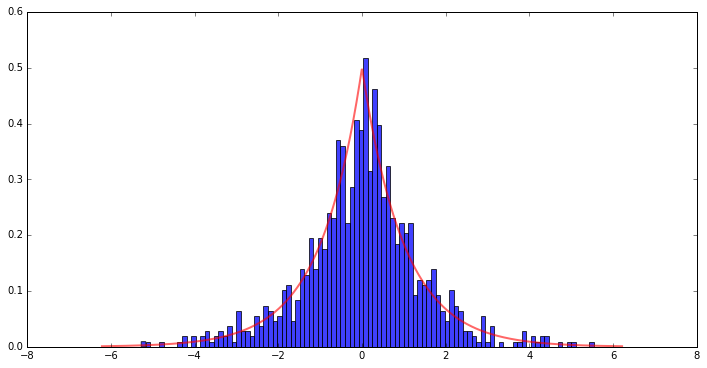

In [5]:
samples = rej_samples[0]
plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(samples, 100, normed=1, facecolor='blue', alpha=0.75)
x = np.linspace(stats.laplace.ppf(0.001),stats.laplace.ppf(0.999), 1000)
plt.plot(x, stats.laplace.pdf(x),'r-', lw=2, alpha=0.6, label='cauchy pdf')


In [6]:
ks_statistics, pvalue = stats.ks_2samp(stats.laplace.rvs(loc=0.0, scale=1.0, size = 1000), samples)
print("Kolmogorov-Smirnof Test: ")
print("Statistic: "+ str(ks_statistics))
print("p-value: "+ str(pvalue))

Kolmogorov-Smirnof Test: 
Statistic: 0.021
p-value: 0.979010305682


## Part b: Reference -- Student's t, Target -- Laplace

In [7]:
##
# Find a good M when ref is student t with df = 2 
b = 1
M = 0.1 + 1 / float(stats.t.pdf(0,df = 2))
print("M = " +str(M))
num_sample = 1000
# rejection sampling
rej_samples = rejection_sampling(laplace, stats.t(df = 2), num_sample, M)
print("Acceptance rate = " + str(rej_samples[1]) )

M = 2.92842712475
Acceptance rate = 0.672043010753


## Part d: Reference -- Normal, Target-- Cauchy

In [8]:
def target (x):
    """Function define a Cauchy distribution f(x)
       Input: x a scaler 
       Output: y = f(x)
    """
    if x >= -1 and x < 0 :
        return x + 1
    elif x >= 0 and x < 1 :
        return 1 - x
    else:
        return 0

In [11]:
##
# Find a good M when ref is U[-1,1]
M = 4
num_sample = 5000
# rejection sampling
rej_samples = rejection_sampling(target, stats.uniform(loc = -1, scale = 2), num_sample, M)

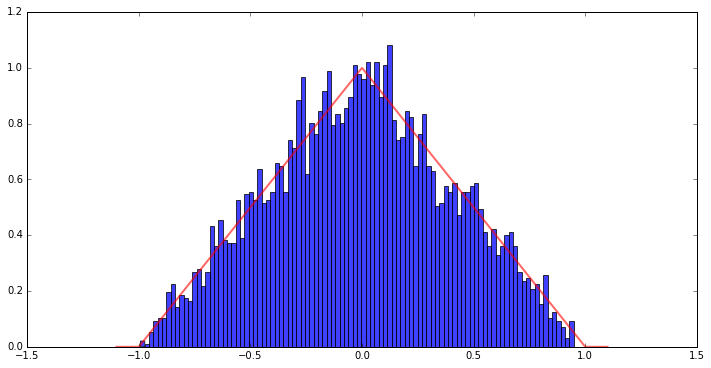

In [12]:
samples = rej_samples[0]
plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(samples, 100, normed=1, facecolor='blue', alpha=0.75)
x = np.linspace(-1.1, 1.1, 1000)
y = np.array([])
for xi in x:
    yi = target(xi)
    y = np.append(y,[yi])
    
plt.plot(x, y,'r-', lw=2, alpha=0.6, label='target pdf')